In [1]:
import librosa
import numpy as np
#from matplotlib import pyplot as plt
#from pydub import AudioSegment
from scipy import signal
from sklearn import preprocessing
import os
import matplotlib.pyplot as plt
#import tensorflow_io as tfio
import warnings
warnings.simplefilter("ignore", UserWarning)
from tensorflow.keras.callbacks import EarlyStopping
import random

In [2]:
import os
os.getcwd()

'/home/stud/m/mh361/share'

In [3]:
pathAudio = '/home/stud/m/mh361/share/sample-same/'
files = librosa.util.find_files(pathAudio, ext=['mp3'])
songa = []
songb = []
songc = []
songbad = []
for file in files:
    if "Holizna" in file:
        songa.append(file)
    if "Lounge It" in file:
        songb.append(file)
    if "Tuesday" in file:
        songc.append(file)
    if "John" in file:
        songbad.append(file)
filesa = sorted(songa, key=lambda x: int(x.split('_')[-1].split(".")[0]))
filesb = sorted(songb, key=lambda x: int(x.split('_')[-1].split(".")[0]))
filesc = sorted(songc, key=lambda x: int(x.split('_')[-1].split(".")[0]))
filesbad = sorted(songbad, key=lambda x: int(x.split('_')[-1].split(".")[0]))
filesa = filesa[:-1]
filesb = filesb[:-1]
filesc = filesc[:-1]
filesbad = filesbad[:-1]

files = filesa+filesb+filesc


In [4]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


samples = []
samples_sec_canal = []
samplesbad = []
for file_name in files:
    x, sr = librosa.load(file_name, sr=44100)
    normalized_sample = NormalizeData(x)
    #resampled_sample = signal.resample(normalized_sample, 44100)
    resampled_sample = signal.resample(normalized_sample, int(len(normalized_sample) / 10))
    #samples.append(resampled_sample)
    samples.append(resampled_sample)
for a in filesbad:
    b, sr = librosa.load(a, sr=44100)
    normalized_sample_bad = NormalizeData(b)
    #resampled_sample = signal.resample(normalized_sample, 44100)
    resampled_sample_bad = signal.resample(normalized_sample_bad, int(len(normalized_sample_bad) / 10))
    #samples.append(resampled_sample)
    samplesbad.append(resampled_sample_bad)

In [5]:
#example_x_train = samples[3]
#plt.plot(example_x_train)
#plt.show()

In [6]:
# Create first sequences with 4 samples in a row
X_train = []
Y_train = []
for i in range(len(samples)):   
    if i < len(samples)-6:
        Y_train.append(1)
        first_sample = list(samples[i])
        second_sample = list(samples[i+1])
        third_sample = list(samples[i+2])
        fourth_sample = list(samples[i+3])
        z = first_sample + second_sample + third_sample + fourth_sample
        X_train.append(z)
#    else:
 #       x = list(samples[i])
  #      y = list(samples[0])
   #     z = x + y
    #    X_train.append(z)

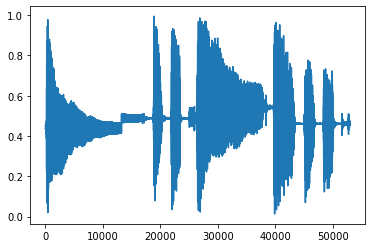

In [7]:
example_x_train = X_train[0]
plt.plot(example_x_train)
plt.show()

In [8]:
# Create second sequences with 4 samples in a row starting from second sample
for i in range(len(samples)):   
    if i < len(samples)-6:
        Y_train.append(1)
        first_sample = list(samples[i])
        second_sample = list(samples[i+1])
        third_sample = list(samples[i+2])
        fifth_sample = list(samples[i+4])
        z = second_sample + third_sample + fourth_sample + fifth_sample
        X_train.append(z)
#    else:
 #       x = list(samples[i])
  #      y = list(samples[0])
   #     z = x + y
    #    X_train.append(z)

In [9]:
#Play Audio File!!

#import IPython.display as ipd
#ipd.Audio(X_train[0], rate=44100)

In [10]:
'''# Create first sequences with 3 samples + 1 skipped

for i in range(len(samples)):
    if i < len(samples)-6:
        Y_train.append(1)
        first_sample = list(samples[i])
        second_sample = list(samples[i+1])
        third_sample = list(samples[i+2])
        fifth_sample = list(samples[i+4])
        z = first_sample + second_sample + third_sample + fifth_sample
        X_train.append(z)
#    else:
 #       x = list(samples[i])
  #      y = list(samples[0])
   #     z = x + y
    #    X_train.append(z)'''

'# Create first sequences with 3 samples + 1 skipped\n\nfor i in range(len(samples)):\n    if i < len(samples)-6:\n        Y_train.append(1)\n        first_sample = list(samples[i])\n        second_sample = list(samples[i+1])\n        third_sample = list(samples[i+2])\n        fifth_sample = list(samples[i+4])\n        z = first_sample + second_sample + third_sample + fifth_sample\n        X_train.append(z)\n#    else:\n #       x = list(samples[i])\n  #      y = list(samples[0])\n   #     z = x + y\n    #    X_train.append(z)'

In [11]:
'''# Create sequence with 3 correct and 1 false sample in a row
X_false = []
Y_false = []
shuffled = samples

random.shuffle(shuffled)


for i in range(len(samples)):
    if i < len(samples)-6:   
        Y_false.append(0)
        first_sample = list(samples[i])
        second_sample = list(samples[i+1])
        third_sample = list(samples[i+2])
        fourth_sample = list(shuffled[i]) 
        z = first_sample + second_sample + third_sample + fourth_sample
        X_false.append(z)
#    else:
 #       x = list(samples[i])
  #      y = list(samples[0])
   #     z = x + y
    #    X_false.append(z)     '''

'# Create sequence with 3 correct and 1 false sample in a row\nX_false = []\nY_false = []\nshuffled = samples\n\nrandom.shuffle(shuffled)\n\n\nfor i in range(len(samples)):\n    if i < len(samples)-6:   \n        Y_false.append(0)\n        first_sample = list(samples[i])\n        second_sample = list(samples[i+1])\n        third_sample = list(samples[i+2])\n        fourth_sample = list(shuffled[i]) \n        z = first_sample + second_sample + third_sample + fourth_sample\n        X_false.append(z)\n#    else:\n #       x = list(samples[i])\n  #      y = list(samples[0])\n   #     z = x + y\n    #    X_false.append(z)     '

In [12]:
# Create empty lists
X_false = []
Y_false = []

In [13]:
from numpy import random



def get_strange_end_part(samples, current_index, max_len):
    x = random.randint(max_len)
    if (x != current_index) and (x != current_index+ 1) and (x != current_index + 2) and (x != current_index +3) and (x != current_index+4):
        return samples[x]
    else:
        return get_strange_end_part(samples, current_index, max_len)

for b in range(5):
    for i in range(len(samples)):
        if i < len(samples)-6:
            Y_false.append(0)
            first_sample = list(samples[i])
            second_sample = list(samples[i+1])
            third_sample = list(samples[i+2])
            random_sample = get_strange_end_part(samples, i, len(samples))
            new_sample = first_sample + second_sample + third_sample + list(random_sample)
            X_false.append(new_sample)


In [14]:
def get_strange_end_part_bad(samplesbad, current_index, max_len):
    x = random.randint(max_len)
    if (x != current_index) and (x != current_index+ 1) and (x != current_index + 2) and (x != current_index +3) and (x != current_index+4):
        return samplesbad[x]
    else:
        return get_strange_end_part(samplesbad, current_index, max_len)

for i in range(len(samples)):
    if i < len(samples) - 6:
        Y_false.append(0)
        first_sample = list(samples[i])
        second_sample = list(samples[i + 1])
        third_sample = list(samples[i + 2])
        random_sample = get_strange_end_part_bad(samplesbad, i, len(samplesbad))
        new_sample = first_sample + second_sample + third_sample + list(random_sample)
        X_false.append(new_sample)

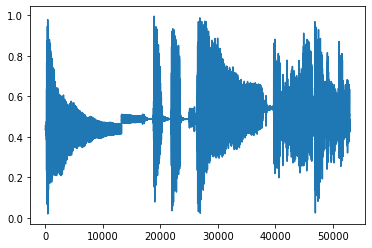

In [15]:
example_x_train = X_false[0]
plt.plot(example_x_train)
plt.show()

In [16]:
'''from numpy import random

X_false = []
Y_false = []


def get_strange_end_part(samples, current_index, max_len):
    x = random.randint(max_len)
    if (x != current_index) and (x != current_index+ 1) and (x != current_index + 2) and (x != current_index +3) and (x != current_index+4):
        return samples[x]
    else:
        return get_strange_end_part(samples, current_index, max_len)


for i in range(len(samples)-6):
    Y_false.append(0)
    first_sample = list(samples[i])
    second_sample = list(samples[i+1])
    third_sample = list(samples[i+2])
    random_sample = get_strange_end_part(samples, i, len(samples))
    new_sample = first_sample + second_sample + third_sample + list(random_sample)
    X_false.append(new_sample)'''

'from numpy import random\n\nX_false = []\nY_false = []\n\n\ndef get_strange_end_part(samples, current_index, max_len):\n    x = random.randint(max_len)\n    if (x != current_index) and (x != current_index+ 1) and (x != current_index + 2) and (x != current_index +3) and (x != current_index+4):\n        return samples[x]\n    else:\n        return get_strange_end_part(samples, current_index, max_len)\n\n\nfor i in range(len(samples)-6):\n    Y_false.append(0)\n    first_sample = list(samples[i])\n    second_sample = list(samples[i+1])\n    third_sample = list(samples[i+2])\n    random_sample = get_strange_end_part(samples, i, len(samples))\n    new_sample = first_sample + second_sample + third_sample + list(random_sample)\n    X_false.append(new_sample)'

In [17]:
#example_x_train = X_false[0]
#plt.plot(example_x_train)
#plt.show()

In [18]:
'''# Create sequence with false samples 
for i in range(len(samples)):
    if i < len(samples)-6:  
        Y_false.append(0)
        first_sample = list(samples[i])
        second_sample = list(samples[i+1])
        third_sample = list(samples[i+2])
        fourth_sample = list(shuffled[i+6]) 
        z = first_sample + second_sample + third_sample + fourth_sample
        X_false.append(z)
#    else:
 #       x = list(samples[i])
  #      y = list(samples[0])
   #     z = x + y
    #    X_false.append(z)        '''

'# Create sequence with false samples \nfor i in range(len(samples)):\n    if i < len(samples)-6:  \n        Y_false.append(0)\n        first_sample = list(samples[i])\n        second_sample = list(samples[i+1])\n        third_sample = list(samples[i+2])\n        fourth_sample = list(shuffled[i+6]) \n        z = first_sample + second_sample + third_sample + fourth_sample\n        X_false.append(z)\n#    else:\n #       x = list(samples[i])\n  #      y = list(samples[0])\n   #     z = x + y\n    #    X_false.append(z)        '

In [19]:
'''X_train_total = []
Y_train_total = []

X_train_total.append(X_train)
X_train_total.append(X_false)
Y_train_total.append(Y_train)
Y_train_total.append(Y_false)'''


'X_train_total = []\nY_train_total = []\n\nX_train_total.append(X_train)\nX_train_total.append(X_false)\nY_train_total.append(Y_train)\nY_train_total.append(Y_false)'

In [20]:
X_train_total = X_train + X_false
Y_train_total = Y_train + Y_false

In [ ]:
X_train_total = np.array(X_train_total)
X_train_total.shape

In [ ]:
Y_train_total = np.array(Y_train_total)
Y_train_total.shape

In [ ]:
'''X_train_total = X_train_total.reshape(-1, 52920 )
X_train_total.shape'''

In [ ]:
Y_train_total = np.array(Y_train_total).reshape(-1, 1)
Y_train_total.shape

In [ ]:
from tensorflow.keras.optimizers import SGD
from keras.layers import LSTM, Dense, Conv1D, MaxPool1D, Flatten, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='causal', activation='relu', input_shape=(52920, 1))) 
model.add(MaxPool1D(pool_size=2)) 
model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu')) 
model.add(MaxPool1D(pool_size=2)) 
model.add(Dropout(0.25))
model.add(LSTM(128)) 
model.add(Dense(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=SGD(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])  
model.summary()

In [ ]:
model.evaluate(X_train_total, Y_train_total)

In [ ]:

model.fit(X_train_total, Y_train_total, epochs=30, batch_size=32)

# 17 min

In [ ]:
example_x_train = X_train_total[0]
plt.plot(example_x_train)
plt.show()
example_x_train = example_x_train.reshape(1, 52920   , 1)
model.predict(example_x_train)

In [ ]:
example_x_train = X_train_total[-1]
plt.plot(example_x_train)
plt.show()
example_x_train = example_x_train.reshape(1, 52920)
model.predict(example_x_train)

In [ ]:
samples_sec_ch = np.array(samples_sec_canal)
full_song_sec_ch = []
for sample in samples_sec_ch:
    full_song_sec_ch.extend(sample)
second_channel_data = full_song_sec_ch[4000:6000]
plt.plot(second_channel_data)
plt.show()
second_channel_data = np.array(second_channel_data)
second_channel_data = second_channel_data.reshape(1, 2000)
model.predict(second_channel_data)

In [ ]:
extracted_sample = full_song_sec_ch[4000:6000]
new_start = extracted_sample[999:1999]
new_end = extracted_sample[0:1000]
switched_sample = new_start + new_end
plt.plot(switched_sample)
plt.show()
switched_sample = np.array(switched_sample)
switched_sample = switched_sample.reshape(1, 2000)
model.predict(switched_sample)

In [ ]:
reversed_sample = reversed_data[4000:6000]
plt.plot(reversed_sample)
plt.show()
reversed_sample = np.array(reversed_sample)
reversed_sample = reversed_sample.reshape(1, 2000)
model.predict(reversed_data)

In [ ]:
#filename = 'model_weights.h5'
#model.save(filename)